# USA.gov data from Bitly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%config InlineBackend.figure_format ='retina'

In [4]:
path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/bitly_usagov/example.txt'
df = pd.read_json(path, lines=True)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


Let's plot the most occuring time-zones.

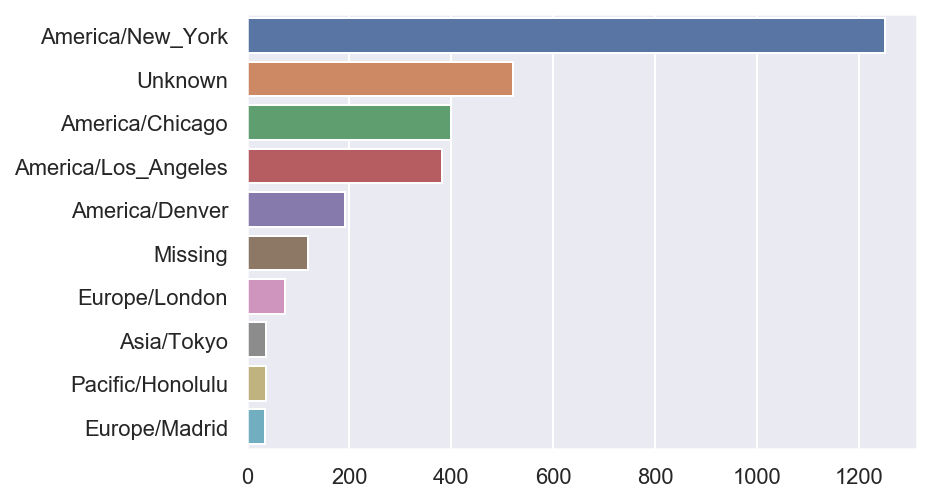

In [5]:
counts = df.tz.str.replace('^$', 'Unknown').fillna('Missing').value_counts()[:10]
sns.barplot(counts.values, counts.index);

Now, let's split the bars by operating system.

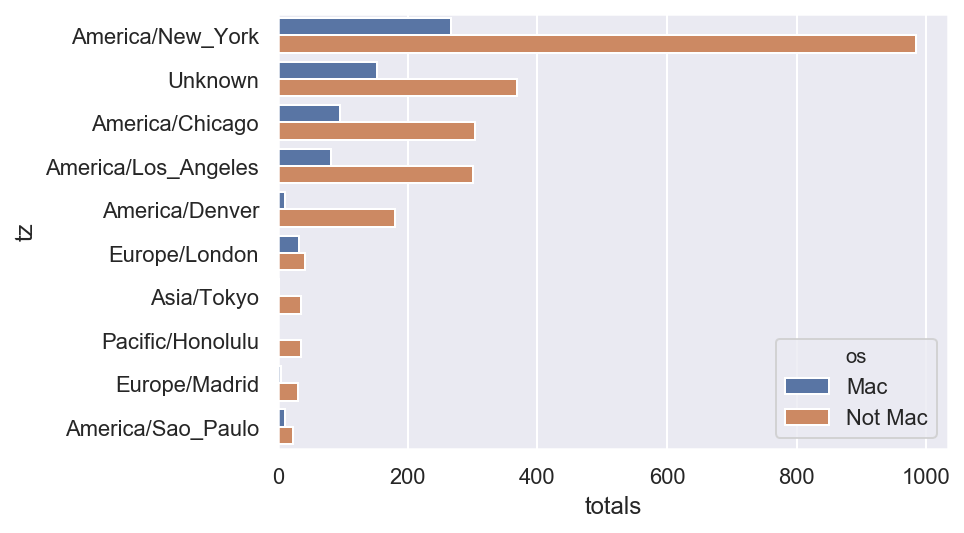

In [54]:
pd.Series.reverse = lambda self: self[::-1]  # Cool trick from here: https://stackoverflow.com/a/46624694

df['os'] = np.where(df.a.str.contains('Mac'), 'Mac', 'Not Mac')

agg_counts = (df.replace('^$', 'Unknown', regex=True)
              .groupby(['tz', 'os'])
              .size()
              .unstack()
              .fillna(0))

indexer = agg_counts.sum(1).argsort()
data = agg_counts.take(indexer[-10:]).reverse().stack()
data.name = 'totals'
data = data.reset_index()

sns.barplot(x='totals', y='tz', hue='os', data=data);

# MovieLens 1M dataset 